In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.colors import LogNorm
import pandas as pd
import os
import astropy.constants
import astropy.units as u
from astropy.visualization import astropy_mpl_style
from scipy.optimize import curve_fit
plt.style.use(astropy_mpl_style)

In [19]:
def plot_regions(image_data, regions, vmax = None, vmin = None, region_labels = True, border_color = 'c'):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    im = ax.imshow(image_data, vmin = vmin, vmax = vmax)
    plt.grid(False)
    plt.title('Region map')
    for i, r in enumerate(regions):
        x, y, w, h = r
        if region_labels:
            ax.text(x-150, y, "#{}".format(i+1), color='m')
        rect = patches.Rectangle((x, y), w, h, linewidth=1, linestyle='--',
                                 edgecolor=border_color, facecolor="none")
        ax.add_patch(rect)

    fig.colorbar(mappable = im)
    plt.show()

def get_region(image_data, region_coords):
    x, y, w, h = region_coords
    region = image_data[y:(y+h), x:(x+w)]
    return region, (w * h, np.mean(region.flat), np.std(region.flat))

# Image preview

In [74]:
files = [os.path.join('data', f) for f in os.listdir('./data')]

def extract_header(fname, fields):
    header = fits.getheader(fname, ext=0)
    return [fname] + [header[f] for f in fields]

fields = ['EXPTIME', 'FILTER', 'IMAGETYP', 'BZERO', 'CCD-TEMP', 'INSTRUME', 'BSCALE', 'XPIXSZ', 'YPIXSZ', 'IMAGEBIN']
data = pd.DataFrame([extract_header(f, fields) for f in files], columns = ["Name"] + fields)
data

,Name,EXPTIME,FILTER,IMAGETYP,BZERO,CCD-TEMP,INSTRUME,BSCALE,XPIXSZ,YPIXSZ,IMAGEBIN
0,data\480_2018_.Bias(0.0S0X1).01.fits,0.12,R,Bias,32768.0,0.2,SBIG ST-10 3 CCD Camera,1.0,6.8,6.8,1X1
1,data\480_2018_.Bias(0.0S0X1).02.fits,0.12,R,Bias,32768.0,-1.1,SBIG ST-10 3 CCD Camera,1.0,6.8,6.8,1X1
2,data\480_2018_.Bias(0.0S0X1).03.fits,0.12,R,Bias,32768.0,0.2,SBIG ST-10 3 CCD Camera,1.0,6.8,6.8,1X1
3,data\480_2018_.Bias(0.0S0X1).04.fits,0.12,R,Bias,32768.0,0.2,SBIG ST-10 3 CCD Camera,1.0,6.8,6.8,1X1
4,data\480_2018_.Bias(0.0S0X1).05.fits,0.12,R,Bias,32768.0,0.2,SBIG ST-10 3 CCD Camera,1.0,6.8,6.8,1X1
5,data\480_2018_.Bias(0.0S0X1).06.fits,0.12,R,Bias,32768.0,-0.2,SBIG ST-10 3 CCD Camera,1.0,6.8,6.8,1X1
6,data\480_2018_.Bias(0.0S0X1).07.fits,0.12,R,Bias,32768.0,-0.2,SBIG ST-10 3 CCD Camera,1.0,6.8,6.8,1X1
7,data\480_2018_.Bias(0.0S0X1).08.fits,0.12,R,Bias,32768.0,-0.2,SBIG ST-10 3 CCD Camera,1.0,6.8,6.8,1X1
8,data\480_2018_.Bias(0.0S0X1).09.fits,0.12,R,Bias,32768.0,-0.2,SBIG ST-10 3 CCD Camera,1.0,6.8,6.8,1X1
9,data\480_2018_.Bias(0.0S0X1).10.fits,0.12,R,Bias,32768.0,-0.2,SBIG ST-10 3 CCD Camera,1.0,6.8,6.8,1X1


# Gain & Read Noise

In [137]:
bimg1 = fits.getdata('data/480_2018_.Bias(0.0S0X1).03.fits', ext=0)
bimg2 = fits.getdata('data/480_2018_.Bias(0.0S0X1).05.fits', ext=0)
fimg = fits.getdata('data/480_2018_.Flat.20S0X1.R.24.fits', ext=0)

fimg = fits.getdata('data/480_2018_.Flat.45S0X1.R.26.fits', ext=0)

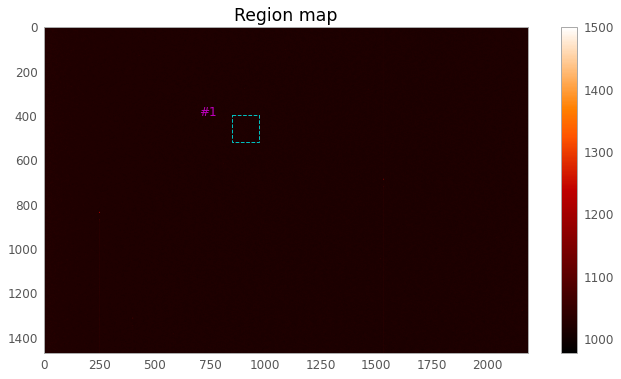

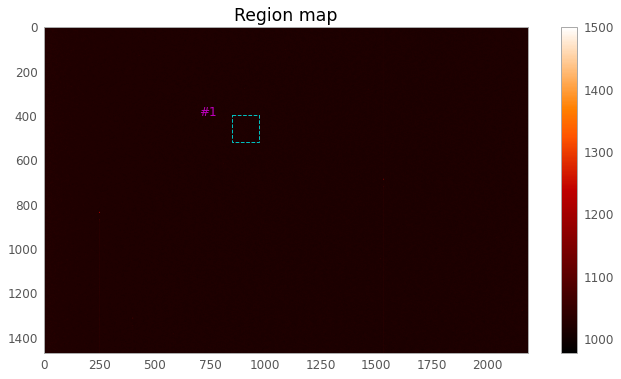

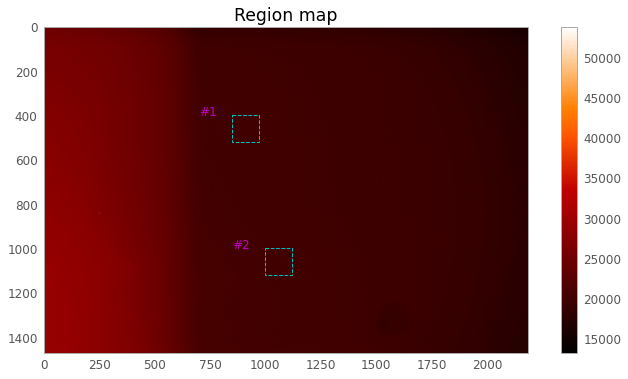

In [138]:
w = 120
h = 120
x1 = 850
y1 = 400
x2 = 1000
y2 = 1000
r1 = r2 = r3 = [x1, y1, w, h]
r4 = [x2, y2, w, h]
plot_regions(bimg1, [r1], vmax=1500)
plot_regions(bimg1, [r2], vmax=1500)
plot_regions(fimg, [r3, r4])

In [139]:
b1, b1_stats = get_region(bimg1, r1)
b2, b2_stats = get_region(bimg2, r2)
f1, f1_stats = get_region(fimg, r3)
f2, f2_stats = get_region(fimg, r4)

f_diff = (f1 - f2).astype(np.int16)
b_diff = (b1 - b2).astype(np.int16)

gain = (np.mean(f1.flat) + np.mean(f2.flat) - np.mean(b1.flat) - np.mean(b2.flat)) / (np.std(f_diff)**2 - np.std(b_diff)**2)

print("Terms: ", [np.mean(f1.flat), np.mean(f2.flat), np.mean(b1.flat), np.mean(b2.flat), np.std(f_diff), np.std(b_diff)])

print("Gain: {:.32}".format(gain))

Terms:  [20199.572916666668, 20285.30451388889, 1018.0780555555556, 1018.8565277777777, 179.70175284019288, 11.958165871036762]
Gain: 1.1959027999312383805374793155352


In [140]:
# https://physics.stackexchange.com/questions/149516/what-are-adu-analog-to-digital-units
read_noise = gain * np.std(b_diff) / np.sqrt(2)
print("Read noise: {:.2f} (electrons), {:.2f} (ADU)".format(read_noise, read_noise/gain))

Read noise: 10.11 (electrons), 8.46 (ADU)


# Linearity

In [105]:
reg = [80, 1000, 200, 200]
lindata = data[data.IMAGETYP=='Flat'].sort_values('EXPTIME').apply(
    lambda r: pd.Series([
        r.EXPTIME,
        get_region(fits.getdata(r.Name, ext=0), reg)[1][1],
        get_region(fits.getdata(r.Name, ext=0), reg)[1][2]
    ], index=['EXPTIME', 'MEAN', 'STD']), axis=1)
lindata

,EXPTIME,MEAN,STD
12,0.2,1225.111125,15.503441
11,0.5,1475.787475,21.468425
17,1.0,2242.947000,35.660513
21,5.0,7704.262700,119.960799
14,10.0,7726.809250,117.083094
18,20.0,12129.371800,172.440347
19,30.0,21496.743675,315.609579
20,45.0,28326.746225,398.285098
22,60.0,57505.525700,404.213899
23,90.0,57592.900200,400.061669


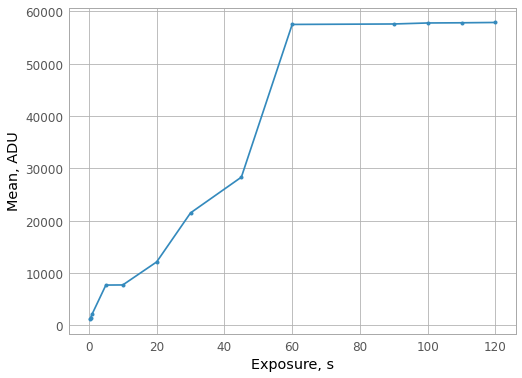

In [106]:
fig = plt.figure()
plt.plot(lindata.EXPTIME, lindata.MEAN, '.-')
plt.xlabel('Exposure, s')
plt.ylabel('Mean, ADU')
plt.show()

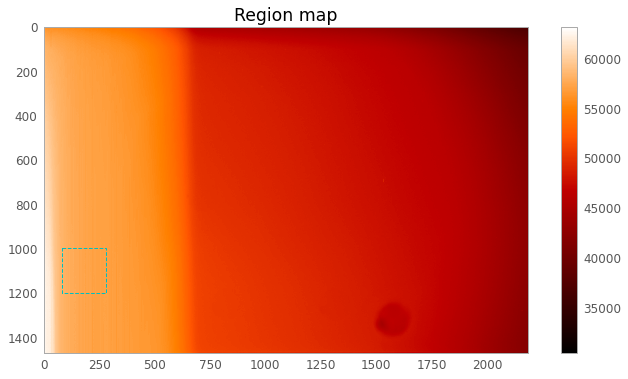

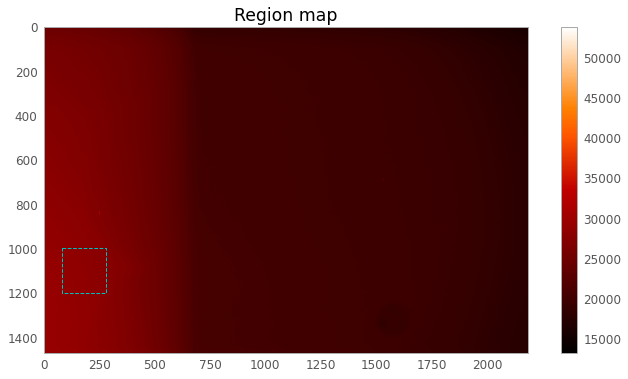

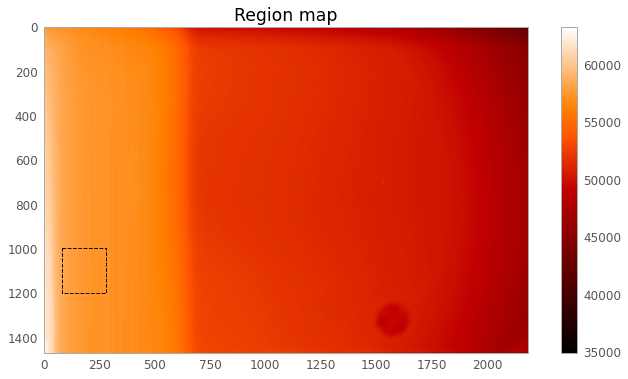

In [108]:
bogus = fits.getdata('data/480_2018_.Flat.60S0X1.R.22.fits', ext=0)
plot_regions(bogus, [reg], region_labels=False)

img45 = fits.getdata('data/480_2018_.Flat.45S0X1.R.26.fits', ext=0)
plot_regions(img45, [reg], region_labels=False)

img90 = fits.getdata('data/480_2018_.Flat.90S0X1.R.20.fits', ext=0)
plot_regions(img90, [reg], region_labels=False, border_color='k')

# Dark current

In [162]:
gain = 2.3
exp = 120
dc_data = pd.read_csv('dark_current.txt', sep='\s+')
dc_data['TempK']= dc_data.Temp + 273.15
dc_data['BiasE']= dc_data.Bias*gain/exp
dc_data['TempKInv']= 1/dc_data.TempK
dc_data

,Temp,Bias,TempK,BiasE,TempKInv
0,-15.0,13,258.15,0.249167,0.003874
1,-10.0,15,263.15,0.287500,0.003800
2,-8.0,16,265.15,0.306667,0.003771
3,-6.0,17,267.15,0.325833,0.003743
4,-4.2,19,268.95,0.364167,0.003718
5,-2.3,22,270.85,0.421667,0.003692
6,0.0,24,273.15,0.460000,0.003661
7,2.0,28,275.15,0.536667,0.003634
8,3.6,32,276.75,0.613333,0.003613
9,5.8,37,278.95,0.709167,0.003585


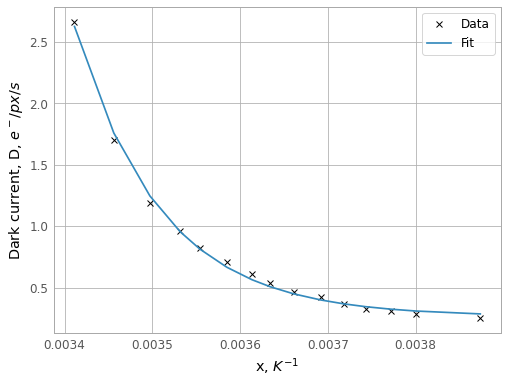

In [307]:
def curve(x, b, K, c):
    y = 2.5e15*K*1/x**(1.5)*np.exp(-b*x) + c
    return y

xdata = 1/dc_data.TempK
ydata = dc_data.BiasE

parameters, covariance = curve_fit(curve, xdata, ydata, bounds=[(0, 0, 0), (np.inf, np.inf, np.inf)])

fig = plt.figure()
plt.plot(xdata, ydata, 'kx', label='Data')
plt.plot(xdata, curve(xdata, parameters[0], parameters[1], parameters[2]), label='Fit')
plt.xlabel('x, $K^{-1}$')
plt.ylabel('Dark current, D, $e^-/px/s$')
plt.legend()
plt.show()

In [308]:
conv = u.K * 2*astropy.constants.k_B.to(u.eV / u.K)

sigma_b, sigma_K, sigma_C = np.sqrt(np.diag(covariance)) 

print(parameters[0]*conv, sigma_b*conv)

1.685435044400144 eV 0.06116468046935237 eV


In [309]:
parameters[1], sigma_K

(5.789362918652037e-05, 7.013638048647561e-05)

In [310]:
77096185769.91177  / 103821309058.42824

0.7425853754793615

In [311]:
parameters

array([9.77933076e+03, 5.78936292e-05, 2.64280245e-01])